# B-tree Implementation for Key-value Store
#### An example project illustring B-tree implementation in a key-value store, with numeric or non-numeric unique keys, range look-up, and functional and performance tests

In [1]:
# To structure code automatically
%load_ext nb_black

<IPython.core.display.Javascript object>

### Import B-Tree Implementation

In [2]:
from btree import BTree

<IPython.core.display.Javascript object>

### KVStore Implementation

In [3]:
class KVStore(BTree):
    def __init__(self, split_threshold=2):
        super().__init__(split_threshold)

    def __getitem__(self, key):
        return self.get_value(key)

    def __setitem__(self, key, value):
        self.add(key, value)

    def __contains__(self, key):
        return self.contains(key)

    def _range_query(
        self, current_node, range_start, range_end, min_key, max_key,
    ):
        if range_end < min_key or range_start > max_key:
            return []
        results = []
        for i, key in enumerate(current_node.keys):
            if range_start <= key <= range_end:
                results.append(current_node.values[i])
        if not current_node.is_leaf():
            for i, child in enumerate(current_node.children):
                new_min_key = current_node.keys[i - 1] if i > 0 else min_key
                new_max_key = current_node.keys[i] if i < len(current_node) else max_key
                results += self._range_query(
                    child, range_start, range_end, new_min_key, new_max_key
                )
        return results

    def range_query(self, range_start, range_end):
        key_numeric = str(range_start).isnumeric()
        if key_numeric:
            min_key = float("-inf")
            max_key = float("inf")
        else:
            str_factor = len(range_end) + 5
            min_key = ""
            max_key = "z" * str_factor

        return self._range_query(self.root, range_start, range_end, min_key, max_key,)

<IPython.core.display.Javascript object>

### Testing with Numeric Keys

In [4]:
# Test for split_threshold
kv = KVStore()
assert kv.split_threshold == 2, "The split threshold is not equal to 2."

# Test for initial key, value add
keys = list(range(0, 10))

for i in keys:
    kv.add(i, i)
for i in keys:
    assert kv.get_value(i) == i, "Expected value not retrieved."

# Test for updated value add
for i in keys:
    kv.add(i, i + 1)

for i in keys:
    assert kv.get_value(i) == i + 1, "Expected value not retrieved."

# Test for bracket syntax assignment
for i in keys:
    kv[i] = i
for i in keys:
    assert kv.get_value(i) == i, "Expected value not retrieved."

# Test for bracket syntax retrieval
for i in keys:
    kv[i] == i, "Expected value not retrieved."

# Test for value overwrite with bracket syntax
for i in keys:
    kv[i] = i + 1
for i in keys:
    assert kv.get_value(i) == i + 1, "Expected value not retrieved."

# Re-test bracket syntax retrieval with updated keys
for i in keys:
    assert kv[i] == i + 1, "Expected value not retrieved."

# Testing bracket syntax for contains key
for i in keys:
    assert kv.contains(i), "Expected value not retrieved."
not_keys = [i - 100 for i in keys]
for not_i in not_keys:
    assert not kv.contains(not_i), "Expected value not retrieved."

# Testing range_query
sub_keys = keys[2:9]
for i in keys:
    kv[i] = i
for i in sub_keys:
    assert i in kv.range_query(keys[2], keys[8]), "Expected value not retrieved."
for i in [i for i in keys if i not in sub_keys]:
    assert i not in kv.range_query(keys[2], keys[8]), "Expected value not retrieved."

<IPython.core.display.Javascript object>

### Testing with String Keys

In [5]:
kv = KVStore()
keys = "abcdefghijk"
for i in keys:
    kv[i] = i

# Testing bracket syntax for contains key
for i in keys:
    assert kv.contains(i), "Expected value not retrieved"
not_keys = ["lmnopqrstuvwxyz"]
for not_i in not_keys:
    assert not kv.contains(not_i), "Expected value not retrieved"

# Testing range_query
sub_keys = keys[2:9]
for i in keys:
    kv[i] = i
for i in sub_keys:
    assert i in kv.range_query(keys[2], keys[8]), "Expected value not retrieved."
for i in [i for i in keys if i not in sub_keys]:
    assert i not in kv.range_query(keys[2], keys[8]), "Expected value not retrieved."

<IPython.core.display.Javascript object>

### Random Tests

In [15]:
class DictKVStore(dict):
    def range_query(self, range_start, range_end):
        results = []
        for key in self.keys():
            if range_start <= key <= range_end:
                results.append(self[key])
        return results

<IPython.core.display.Javascript object>

In [44]:
import random
import time
import matplotlib.pyplot as plt

keys = [random.randint(0, 10000) for i in range(0, 10000)]

dict_kv = DictKVStore()
for k in keys:
    dict_kv[k] = k

new_kv = KVStore()
for k in keys:
    new_kv[k] = k

start_increment_list = [(random.randint(0, 9000), i) for i in range(1000)]
range_list = [
    (range_start, range_start + increment)
    for range_start, increment in start_increment_list
]

dict_kv_times = []
new_kv_times = []
for range_start, range_end in range_list:
    start = time.time()
    dict_kv_res = sorted(dict_kv.range_query(range_start, range_end))
    end = time.time()
    dict_kv_times.append(end - start)

    start = time.time()
    new_kv_res = sorted(new_kv.range_query(range_start, range_end))
    end = time.time()
    new_kv_times.append(end - start)

    assert dict_kv_res == new_kv_res, "Results differ beteen DictKVStore and KVStore."

<IPython.core.display.Javascript object>

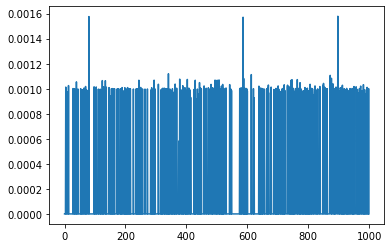

<IPython.core.display.Javascript object>

In [46]:
plt.plot(dict_kv_times)
